## A notebook that combines the original Neckel Labs spectral axis files into single numpy files

* Source of Neckel Labs files was from: ftp -p ftp.hs.uni-hamburg.de

    ftp> cd /pub/outgoing/
    ftp> ls
    drwxrwxr-x    2 0        750          4096 Feb 24  2003 BKuhlbrodt
    dr-xr-xr-x    2 0        0            4096 Dec 14  2020 FTS-Atlas
    lrwxrwxrwx    1 0        0               4 Oct 27  2009 HES -> /HES
    lrwxrwxrwx    1 0        0               4 Oct 27  2009 HQS -> /HQS
    drwx--x--x   24 33       0            4096 Oct 30 21:39 HRT

* Note that there are 20 files.  The first 10 are the disk integrated spectrum and the 2nd 10 are the disk center spectrum 
* Units are W cm^-2 ster^-1 Angstrom^-1 

In [1]:
import numpy as np 
import glob 
import os 
from astropy.io import fits
from astropy.time import Time
import sys
from tqdm.auto import trange
import sys

%matplotlib widget
import matplotlib.pyplot as plt
plt.rcParams["image.origin"] = 'lower'
plt.rcParams['font.sans-serif'] = "Comic Sans MS"
plt.rcParams['font.family'] = "serif"
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams["image.interpolation"] = 'nearest'
plt.rcParams['figure.dpi'] = 100 # 150

In [2]:
files = glob.glob('./file*')
files.sort()
for f in files: print(f)

./file01
./file02
./file03
./file04
./file05
./file06
./file07
./file08
./file09
./file10
./file11
./file12
./file13
./file14
./file15
./file16
./file17
./file18
./file19
./file20


In [3]:
## Disk integrated data 
dint = np.loadtxt(files[0])
for f in files[1:10]:
    dint = np.vstack((dint,np.loadtxt(f)))

In [4]:
## Disk center data 
dcen = np.loadtxt(files[10])
for f in files[11:]:
    dcen = np.vstack((dcen,np.loadtxt(f)))

In [5]:
dcen.shape,dint.shape

((1107962, 3), (1019542, 3))

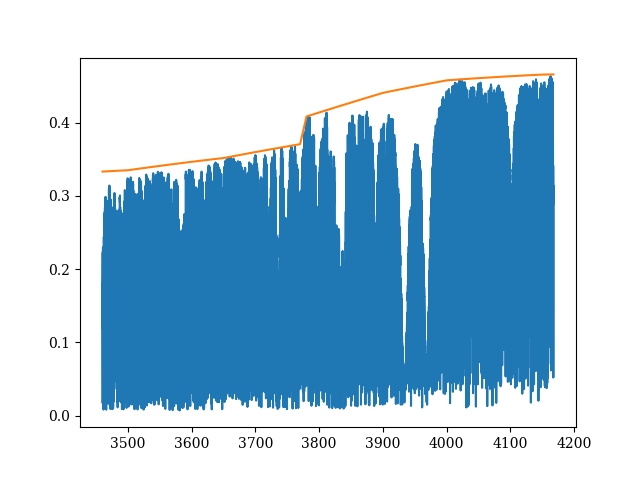

In [6]:
plt.figure()
plt.plot(dcen[42345:192345,0],dcen[42345:192345,1])
plt.plot(dcen[42345:192345,0],dcen[42345:192345,2])

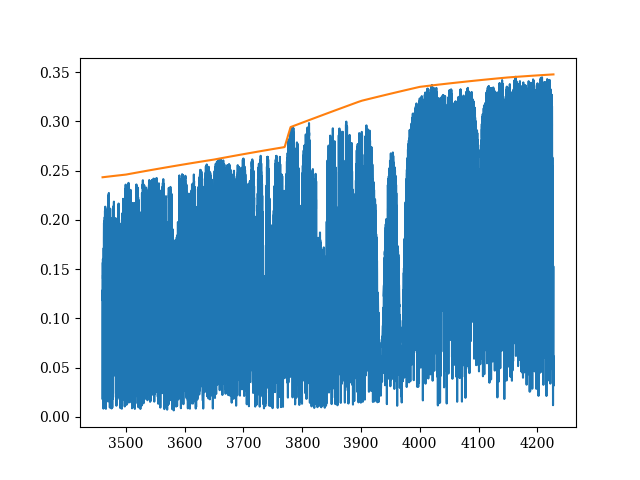

In [7]:
plt.figure()
plt.plot(dint[42345:192345,0],dint[42345:192345,1])
plt.plot(dint[42345:192345,0],dint[42345:192345,2])

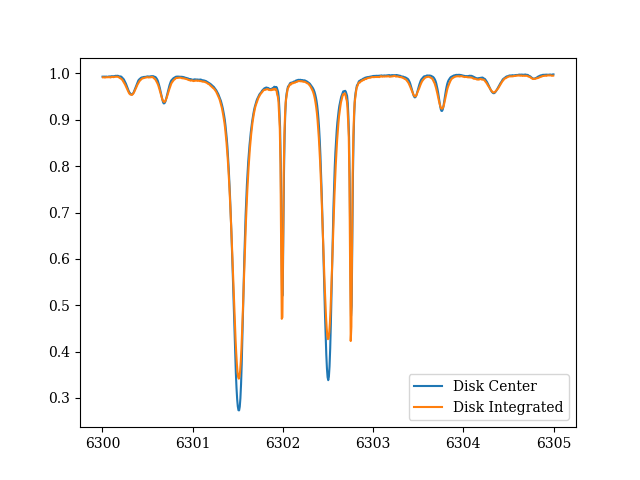

In [8]:
plt.figure()
ww = (dcen[:,0] > 6300) * (dcen[:,0] < 6305)
plt.plot(dcen[ww,0],dcen[ww,1]/dcen[ww,2],label = 'Disk Center')
ww = (dint[:,0] > 6300) * (dint[:,0] < 6305)
plt.plot(dint[ww,0],dint[ww,1]/dint[ww,2],label = 'Disk Integrated')
plt.legend()

In [9]:
np.save('./neckel_labs_1984_disk_center_atlas.npy',dcen.astype(np.float32))
np.save('./neckel_labs_1984_disk_integated_atlas.npy',dint.astype(np.float32))